In [58]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Science
import numpy as np
import pandas as pd

# Multi-dimensional arrays and datasets
import xarray as xr

# Geospatial raster data handling
import rioxarray as rxr

# Geospatial data analysis
import geopandas as gpd

# Geospatial operations
import rasterio
from rasterio import windows  
from rasterio import features  
from rasterio import warp
from rasterio.warp import transform_bounds 
from rasterio.windows import from_bounds 
from shapely.geometry import mapping, box

# Image Processing
from PIL import Image

# Coordinate transformations
from pyproj import Proj, Transformer, CRS

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Planetary Computer Tools
import pystac_client
import planetary_computer as pc
from pystac.extensions.eo import EOExtension as eo

# Others
import os
from tqdm import tqdm

In [89]:
file = "data/features_extracted/street.geojson"
df = gpd.read_file(file)
df.head()

OBJECTID          Join_ID StreetCode           Street TrafDir  \
0         1    2251001000000     226700  EAST 168 STREET       T   
1         2    2798401000000     274810  WEST 192 STREET       A   
2         3    2728001000000     270420     UNION AVENUE       W   
3         4  21279502000000X     270420     UNION AVENUE       W   
4         5  21279503000000X     270420     UNION AVENUE       W   

   StreetWidth_Min  StreetWidth_Max  street_width_avg  RW_TYPE  POSTED_SPEED  \
0             34.0             34.0              34.0        1          25.0   
1             30.0             30.0              30.0        1          25.0   
2             34.0             34.0              34.0        1          25.0   
3             34.0             34.0              34.0        1          25.0   
4             34.0             34.0              34.0        1          25.0   

   ...  Number_Park_Lanes  Number_Total_Lanes  FeatureTyp SegmentTyp BikeLane  \
0  ...                2.0                 4.0           0          U      NaN   
1  ...                2.0                 3.0           0          U      NaN   
2  ...                2.0                 3.0           0          U      NaN   
3  ...                2.0                 3.0           0          U      NaN   
4  ...                2.0                 3.0           0          U      NaN   

   BIKE_TRAFDIR TRUCK_ROUTE_TYPE  Shape__Length  direction  \
0          None              NaN     396.030947      NW-SE   
1          None              NaN     279.360514      NW-SE   
2          None              NaN     618.327133      NE-SW   
3          None              NaN     618.327133      NE-SW   
4          None              NaN     618.327133      NE-SW   

                                            geometry  
0  LINESTRING (-73.90347 40.83036, -73.90238 40.8...  
1  LINESTRING (-73.9012 40.86662, -73.90207 40.86...  
2  LINESTRING (-73.90118 40.8244, -73.90051 40.82...  
3  LINESTRING (-73.90118 40.8244, -73.90051 40.82...  
4  LINESTRING (-73.90118 40.8244, -73.90051 40.82...  

[5 rows x 21 columns]

In [90]:
df.columns

Index(['OBJECTID', 'Join_ID', 'StreetCode', 'Street', 'TrafDir',
       'StreetWidth_Min', 'StreetWidth_Max', 'street_width_avg', 'RW_TYPE',
       'POSTED_SPEED', 'Number_Travel_Lanes', 'Number_Park_Lanes',
       'Number_Total_Lanes', 'FeatureTyp', 'SegmentTyp', 'BikeLane',
       'BIKE_TRAFDIR', 'TRUCK_ROUTE_TYPE', 'Shape__Length', 'direction',
       'geometry'],
      dtype='object')

In [76]:
COORDS = [-74.01, 40.75, -73.86, 40.88]
resolution = 10 # meters per pixel 
scale = resolution / 111320.0 # degrees per pixel for crs=4326

width = int(np.round((COORDS[2] - COORDS[0]) / scale) + 1)
height = int(np.round((COORDS[3] - COORDS[1]) / scale) + 1)
print(width, height)

transformer = Transformer.from_crs("EPSG:4326", "EPSG:2263", always_xy=True)
xmin, ymin, xmax, ymax = COORDS[0], COORDS[1], COORDS[2], COORDS[3]
gt = rasterio.transform.from_bounds(xmin, ymin, xmax, ymax, width, height)
print(gt)
# xmin, ymin = transformer.transform(xmin, ymin)
# xmax, ymax = transformer.transform(xmax, ymax)

# gt = rasterio.transform.from_bounds(xmin, ymin, xmax, ymax, width, height)
# print(width, height)
# print(gt)

1671 1448
| 0.00, 0.00,-74.01|
| 0.00,-0.00, 40.88|
| 0.00, 0.00, 1.00|


In [68]:
idx = index.Index()
for i, geometry in enumerate(df['geometry']):
    print(geometry.bounds)
    idx.insert(i, geometry.bounds)
    print(idx)

(-73.9034682815071, 40.8296549103045, -73.9023814757185, 40.8303620794707)
rtree.index.Index(bounds=[-73.9034682815071, 40.8296549103045, -73.9023814757185, 40.8303620794707], size=1)
(-73.9020747884371, 40.8666213684178, -73.901202101452, 40.8670073957739)
rtree.index.Index(bounds=[-73.9034682815071, 40.8296549103045, -73.901202101452, 40.8670073957739], size=2)
(-73.9011781129234, 40.8243971910923, -73.9005068263005, 40.8260159042596)
rtree.index.Index(bounds=[-73.9034682815071, 40.8243971910923, -73.9005068263005, 40.8670073957739], size=3)
(-73.9011781129234, 40.8243971910923, -73.9005068263005, 40.8260159042596)
rtree.index.Index(bounds=[-73.9034682815071, 40.8243971910923, -73.9005068263005, 40.8670073957739], size=4)
(-73.9011781129234, 40.8243971910923, -73.9005068263005, 40.8260159042596)
rtree.index.Index(bounds=[-73.9034682815071, 40.8243971910923, -73.9005068263005, 40.8670073957739], size=5)
(-73.9011781129234, 40.8243971910923, -73.9005068263005, 40.8260159042596)
rtree.i

KeyboardInterrupt: 

In [71]:
from rtree import index

geometry_col = 'geometry'
idx = index.Index()

# Build the Rtree index for faster spatial queries
for i, geometry in enumerate(df[geometry_col]):
    idx.insert(i, geometry.bounds)  # Insert bounding boxes into the index

raster = np.zeros((height, width), dtype=np.float32)

for i in tqdm(range(width)):
    for j in range(height):
        # Get the bounds of the current raster cell (grid square)
        x_min, y_max = gt * (i, j)
        x_max, y_min = gt * (i + 1, j + 1)
        grid_cell = box(x_min, y_min, x_max, y_max)

        # Clip building footprints by the current grid cell
        possible_matches = list(idx.intersection(grid_cell.bounds))  # Find potential matches
        intersect_idx = [idx for idx in possible_matches if df.iloc[idx, geometry_col].intersects(grid_cell)]
        clipped_streets = df.iloc[intersect_idx]
        raster[j, i] = calculate_raster_value(clipped_streets, grid_cell)


        # Calculate the area of the part of the building that falls within the grid cell
        total_width = 0
        street_type = []
        count = 0 
        for _, street in clipped_streets.iterrows():
            total_width += street['avg_street_width']
            street_type.append(street['RW_TYPE'])
            count += 1

        # Store the total area for the grid cell
        if count == 0:
            street_width_raster[j, i] = -1
            street_type_raster[j, i] = 0
        else:
            street_width_raster[j, i] = total_width / count
            street_type_raster[j, i] = mode(street_type)[0]

 11%|█         | 2/18 [00:00<00:00, 16.53it/s]

POLYGON ((-74.00166666666667 40.87133333333333, -74.00166666666667 40.88, -74.01 40.88, -74.01 40.87133333333333, -74.00166666666667 40.87133333333333))
[]
POLYGON ((-74.00166666666667 40.86266666666667, -74.00166666666667 40.87133333333333, -74.01 40.87133333333333, -74.01 40.86266666666667, -74.00166666666667 40.86266666666667))
[]
POLYGON ((-74.00166666666667 40.854, -74.00166666666667 40.86266666666667, -74.01 40.86266666666667, -74.01 40.854, -74.00166666666667 40.854))
[]
POLYGON ((-74.00166666666667 40.845333333333336, -74.00166666666667 40.854, -74.01 40.854, -74.01 40.845333333333336, -74.00166666666667 40.845333333333336))
[]
POLYGON ((-74.00166666666667 40.836666666666666, -74.00166666666667 40.845333333333336, -74.01 40.845333333333336, -74.01 40.836666666666666, -74.00166666666667 40.836666666666666))
[]
POLYGON ((-74.00166666666667 40.828, -74.00166666666667 40.836666666666666, -74.01 40.836666666666666, -74.01 40.828, -74.00166666666667 40.828))
[]
POLYGON ((-74.00166666

 22%|██▏       | 4/18 [00:00<00:01, 11.51it/s]

POLYGON ((-73.97666666666667 40.87133333333333, -73.97666666666667 40.88, -73.985 40.88, -73.985 40.87133333333333, -73.97666666666667 40.87133333333333))
[]
POLYGON ((-73.97666666666667 40.86266666666667, -73.97666666666667 40.87133333333333, -73.985 40.87133333333333, -73.985 40.86266666666667, -73.97666666666667 40.86266666666667))
[]
POLYGON ((-73.97666666666667 40.854, -73.97666666666667 40.86266666666667, -73.985 40.86266666666667, -73.985 40.854, -73.97666666666667 40.854))
[]
POLYGON ((-73.97666666666667 40.845333333333336, -73.97666666666667 40.854, -73.985 40.854, -73.985 40.845333333333336, -73.97666666666667 40.845333333333336))
[]
POLYGON ((-73.97666666666667 40.836666666666666, -73.97666666666667 40.845333333333336, -73.985 40.845333333333336, -73.985 40.836666666666666, -73.97666666666667 40.836666666666666))
[]
POLYGON ((-73.97666666666667 40.828, -73.97666666666667 40.836666666666666, -73.985 40.836666666666666, -73.985 40.828, -73.97666666666667 40.828))
[]
POLYGON ((

 33%|███▎      | 6/18 [00:00<00:01,  7.65it/s]

POLYGON ((-73.96000000000001 40.75, -73.96000000000001 40.75866666666667, -73.96833333333333 40.75866666666667, -73.96833333333333 40.75, -73.96000000000001 40.75))
[22217, 22216, 22215, 18357, 29458, 25074, 22730, 19825, 25073, 29455, 25114, 25489, 21679, 21680, 24559, 24119, 29457, 29456, 25048, 24155, 22228, 19835, 19271, 20009, 20007, 20008, 32439, 32440, 33208, 18227, 18327, 23118, 23894, 24814, 18238, 24813, 24128, 24074, 24163, 22659, 20028, 29662, 29661, 33209, 33210, 33211, 33496, 33497, 20068, 20069, 17737, 29660, 29664, 29663, 29665, 21903, 21902, 29501, 20587, 20586, 18397, 18398, 29262, 29260, 22231, 20513, 19814, 19845, 19596, 25023, 19592, 23271, 20047, 20187, 31919, 27119, 27120, 25186, 25185, 19279, 22278, 23134, 31918, 21656, 24164, 24165, 31923, 31921, 22624, 24560, 24561, 22625, 23661, 21213, 23617, 17767, 18743, 17665, 21200, 20428, 17753, 18764, 18698, 18713, 20651, 20650, 21231, 20272, 20289, 17666, 24533, 22621, 21240, 21241, 20307, 17682, 23641, 21235, 18221, 2

 39%|███▉      | 7/18 [00:00<00:01,  5.83it/s]

POLYGON ((-73.95166666666667 40.776, -73.95166666666667 40.784666666666666, -73.96000000000001 40.784666666666666, -73.96000000000001 40.776, -73.95166666666667 40.776))
[29675, 29676, 29840, 29846, 29847, 30327, 30328, 30407, 30408, 30418, 30419, 30420, 30668, 30669, 30670, 30655, 30656, 30657, 30658, 30671, 30672, 30673, 24537, 24536, 24534, 24535, 17755, 17765, 24552, 22634, 22633, 22632, 18741, 18742, 21066, 21065, 18755, 18756, 20389, 20388, 20387, 21599, 21600, 31489, 31138, 22080, 21105, 21551, 18656, 21637, 21636, 22552, 22553, 21322, 31139, 18152, 18153, 23510, 22536, 18613, 22537, 22515, 21013, 17630, 21017, 17649, 20493, 24052, 24462, 22471, 22474, 22473, 22472, 19186, 22976, 23645, 24936, 19513, 23017, 23652, 18628, 23556, 22116, 23003, 18141, 19091, 21018, 17667, 20681, 19167, 19140, 22034, 24517, 32023, 24886, 32027, 32025, 32026, 32024, 19466, 20450, 17705, 21008, 21007, 23950, 18690, 22033, 18614, 22998, 18146, 24600, 24532, 19488, 19412, 31135, 31137, 31488, 31487, 311

 44%|████▍     | 8/18 [00:01<00:02,  4.68it/s]

[23809, 31784, 31783, 31634, 31627, 18987, 23911, 23910, 25335, 24013, 24890, 24874, 22514, 19928, 21993, 22100, 19081, 22426, 21273, 22972, 24042, 19388, 20457, 18107, 19323, 23475, 23967, 26634, 26635, 27500, 26184, 27498, 26185, 27499, 24017, 25317, 24016, 19132, 21578, 21576, 21577, 31786, 31787, 31795, 31796, 32158, 32159, 32160, 32163, 32233, 19107, 24963, 19396, 23973, 23041, 22041, 22840, 27480, 27475, 27478, 27479, 29904, 29905, 29906, 29907, 19384, 20056, 20058, 20057, 20967, 20954, 20956, 20955, 20957, 17607, 23486, 17610, 17608, 17609, 24411, 21290, 24820, 24819, 27073, 27074, 27070, 27071, 27072, 27076, 27077, 27075, 21269, 21270, 20683, 18198, 18196, 18199, 18197, 22530, 17584, 22008, 19363, 24972, 18074, 25152, 20378, 25009, 19080, 18986, 18985, 19071, 19135, 18220, 19378, 23214, 18655, 19156, 19374, 18601, 23979, 19380, 19096, 23957, 19301, 20432, 23752, 20524, 25013, 18588, 22988, 18083, 27085, 27083, 27084, 23932, 23933, 22017, 18640, 25008, 20257, 22881, 21923, 23027

 50%|█████     | 9/18 [00:01<00:02,  3.92it/s]

[30810, 28254, 28253, 28250, 28345, 28346, 28251, 28249, 28347, 28252, 28188, 28344, 27117, 28290, 28348, 28257, 28291, 28877, 28876, 28956, 21881, 21882, 31611, 31607, 31610, 20775, 24124, 28187, 28186, 22250, 22144, 29194, 20729, 27788, 32670, 25252, 25251, 18940, 25774, 23731, 23730, 20734, 25773, 25772, 25771, 25791, 25770, 25769, 25768, 25792, 25793, 17938, 22252, 18345, 18138, 25349, 18137, 25348, 25350, 25795, 25796, 25794, 21794, 21795, 21907, 27001, 19837, 21817, 21818, 27002, 25153, 19690, 20445, 22260, 20259, 20592, 27195, 27196, 27197, 27198, 27199, 27204, 27213, 27214, 29303, 29304, 29305, 31608, 31609, 31612, 31613, 31860, 26347, 26346, 21879, 26345, 26344, 26343, 26342, 26371, 26373, 26374, 26372, 19961, 21203, 17850, 20569, 20566, 20567, 20568, 27004, 27003, 27005, 27186, 27187, 27191, 27192, 27193, 27194, 27205, 27206, 27207, 27208, 27209, 27210, 27211, 27212, 31039, 31040, 31041, 25319, 25305, 23116, 23320, 31614, 18959, 24686, 25299, 25338, 25325, 24714, 24621, 22256

 56%|█████▌    | 10/18 [00:02<00:02,  3.18it/s]

[28956, 28873, 28875, 28874, 28872, 28337, 28974, 28880, 28881, 28718, 28717, 28162, 28338, 28878, 28879, 28339, 28957, 28865, 28866, 28924, 28358, 28884, 28883, 28925, 28357, 28896, 28169, 28910, 28911, 28898, 30627, 28889, 28343, 28353, 28350, 28167, 28352, 28342, 28043, 28168, 28166, 28351, 28165, 28163, 24063, 28164, 28893, 28892, 28895, 23225, 28894, 28891, 28890, 28433, 25208, 25207, 30626, 28434, 28900, 28359, 28899, 28888, 28848, 28849, 28958, 30846, 30844, 30625, 28923, 28920, 28922, 28918, 28919, 28921, 28886, 28885, 28354, 28355, 28356, 28349, 28916, 28917, 28882, 28295, 30845, 28293, 28926, 30847, 30848, 36341, 34772, 37645, 37681, 37734, 37735, 37736, 39367, 28851, 28850, 28887, 35528, 36864, 37419, 36675, 33991, 36206, 37671, 37672, 37753, 38867, 39369, 39370, 34005, 34006, 34500, 34513, 34010, 35527, 37451, 35496]
POLYGON ((-73.92666666666666 40.76733333333333, -73.92666666666666 40.776, -73.935 40.776, -73.935 40.76733333333333, -73.92666666666666 40.76733333333333))
[3

 61%|██████    | 11/18 [00:02<00:02,  2.92it/s]

POLYGON ((-73.91833333333334 40.75866666666667, -73.91833333333334 40.76733333333333, -73.92666666666666 40.76733333333333, -73.92666666666666 40.75866666666667, -73.91833333333334 40.75866666666667))
[35463, 34967, 35964, 35965, 35469, 34169, 35507, 38078, 35476, 35963, 35487, 37449, 35974, 34997, 34695, 37475, 34502, 36008, 36460, 35013, 36466, 35431, 35433, 39384, 36942, 33987, 35997, 35996, 36987, 36001, 36985, 36986, 36984, 37422, 33972, 34961, 34931, 36444, 36443, 37445, 37446, 37455, 35019, 34436, 34418, 39490, 39493, 39565, 39566, 39567, 39568, 38132, 38154, 37694, 37205, 37860, 37829, 38186, 36186, 35438, 34950, 34396, 34947, 36447, 35946, 37408, 37399, 34893, 39553, 39554, 39555, 39556, 39559, 39560, 39561, 39563, 39564, 36500, 35524, 36931, 35474, 36654, 38079, 39569, 39570, 33931, 34454, 33936, 35478, 33954, 33953, 35432, 34395, 36426, 36893, 37382, 34423, 36448, 37955, 37636, 33895, 37140, 34949, 34948, 37379, 33907, 33930, 35450, 38039, 38754, 38755, 38758, 38759, 38956, 

 67%|██████▋   | 12/18 [00:02<00:02,  2.83it/s]

POLYGON ((-73.90166666666667 40.87133333333333, -73.90166666666667 40.88, -73.91 40.88, -73.91 40.87133333333333, -73.90166666666667 40.87133333333333))
[18817, 24665, 5316, 5317, 5612, 2795, 1612, 6542, 6541, 6506, 6507, 21, 22, 20, 666, 7341, 7342, 385, 10054, 21773, 13411, 13409, 13408, 13410, 13391, 13403, 13402, 13400, 8513, 11674, 3830, 13389, 13390, 13401, 13405, 13399, 13404, 13394, 13393, 13392, 13395, 13396, 13397, 3754, 8874, 24824, 6173, 29, 28, 6777, 13398, 17225, 3726, 5599, 5600, 17226, 16197, 2457, 4374, 353, 13503, 22719, 6784, 20618, 13504, 7978, 6459, 23, 23710, 17218, 16196, 2458, 17217, 16705, 23709, 12727, 12726, 16202, 4365, 17216, 18827, 545, 17814, 11967, 12725, 11966, 16703, 16704, 11965, 11964, 3231, 3232, 2480, 24899, 29419, 29420, 29421, 29422, 29423, 29424, 30118, 30119, 6029, 1299, 1296, 2314, 11393, 1297, 1298, 11397, 11396, 11394, 11395, 13127, 8046, 8047, 671, 5578, 13125, 13126, 7864, 11939, 11398, 11399, 11941, 7094, 1310, 11400, 11940, 11942, 11402,

 72%|███████▏  | 13/18 [00:03<00:01,  2.68it/s]

[34, 33, 8512, 50, 1319, 1904, 684, 3721, 3755, 4361, 15827, 15898, 4054, 10341, 368, 369, 10342, 10343, 10344, 10345, 10346, 6523, 6522, 10348, 10347, 10349, 10350, 10351, 367, 10365, 8838, 10366, 10367, 10368, 10369, 10371, 10370, 10372, 10373, 330, 13364, 13365, 7331, 15014, 15799, 15872, 15873, 15875, 7388, 6155, 3720, 2817, 6166, 8519, 8517, 8516, 8518, 4995, 8515, 6160, 6527, 4068, 1903, 10587, 10588, 10589, 10590, 10591, 10592, 10594, 10593, 4431, 7958, 7957, 6814, 9213, 10585, 10584, 10586, 6844, 6845, 6816, 6815, 2519, 6188, 10555, 10554, 10558, 10556, 10557, 692, 691, 10553, 10552, 10551, 45, 1910, 10595, 10610, 10611, 10780, 11833, 12063, 10779, 13092, 13098, 13109, 3132, 3133, 15894, 15896, 15897, 10364, 4114, 4027, 10764, 4113, 4112, 4111, 693, 1585, 1584, 4051, 5268, 5276, 10375, 10376, 10377, 10378, 10379, 10381, 10380, 10382, 10383, 10384, 10385, 10386, 8868, 3717, 1313, 6769, 6770, 4370, 4371, 12834, 10776, 4375, 3722, 10778, 10777, 12277, 10374, 2790, 13099, 13103, 13

 78%|███████▊  | 14/18 [00:03<00:01,  2.87it/s]

POLYGON ((-73.89333333333333 40.75, -73.89333333333333 40.75866666666667, -73.90166666666667 40.75866666666667, -73.90166666666667 40.75, -73.89333333333333 40.75))
[38272, 37917, 34698, 34628, 37161, 35697, 34728, 38032, 34740, 35262, 38273, 36236, 37203, 36514, 35146, 35032, 37849, 35212, 35158, 36222, 36671, 38099, 34237, 39972, 39973, 38275, 38212, 34742, 35133, 37599, 38198, 37584, 36692, 34104, 34696, 34296, 38199, 35240, 39477, 36595, 36516, 37790, 34815, 38906, 38907, 37726, 37727, 38913, 36999, 35859, 34814, 36824, 35903, 35342, 39268, 37288, 34765, 34033, 37651, 39264, 39269, 39270, 36862, 39271, 39262, 39261, 39272, 39267, 34762, 39274, 39266, 39265, 39260, 39263, 34888, 39273, 34021, 38911, 34545, 36997, 39614, 39968, 39969, 34020, 36750, 36751, 36678, 37768, 36717, 35559, 39237, 39542, 39543, 39900, 39901, 39902, 39903, 39904, 37000, 37289, 36174, 36175, 36681, 37242, 36296, 35247, 36238, 34298, 37181, 37493, 38026, 37969, 36702, 38098, 38027, 37684, 37850, 37685, 34702, 3

 83%|████████▎ | 15/18 [00:04<00:01,  2.66it/s]

[38688, 38690, 39190, 39192, 39188, 39191, 39189, 39251, 39194, 39196, 39195, 39193, 39252, 39198, 39197, 39199, 39200, 39253, 39254, 39220, 39218, 39219, 39228, 39214, 39216, 39215, 39201, 39202, 39205, 39203, 39211, 39213, 39210, 39212, 39204, 39255, 39353, 39395, 39396, 39637, 39722, 39727, 39728, 39729, 39730, 39731, 39732, 39733, 39734, 39735, 39736, 39737, 39738, 39739, 39740, 39741, 39742, 39848, 39849, 39850, 39851, 39852, 39853, 39854, 39855, 39856, 39857, 39858, 34099, 34100, 34111, 34640, 35142, 34649, 35251, 35622, 36243, 36712, 37094, 37095, 36617, 35145, 37689, 39206, 39207, 39208, 39209, 39636, 39723, 39724, 36111, 34629, 34113, 34630, 34121, 35159, 36616, 35621, 36122, 35136, 34829, 36262, 34615, 37086, 34620, 34108, 36701, 36113, 34254, 34267, 36607, 35769, 37301, 35155, 35151, 35738, 35793, 34114, 37096, 34247, 35278, 37077, 36740, 35766, 35245, 34617, 34767, 37601, 37631, 37716, 37848, 38103, 38146, 39441, 39442, 39443, 39444, 39445, 39446, 39447, 39448, 39449, 39450

 89%|████████▉ | 16/18 [00:04<00:00,  2.82it/s]

[1456, 261, 3817, 4597, 2642, 4598, 6400, 15373, 15374, 8082, 3299, 4890, 1517, 8698, 7535, 6380, 7577, 6323, 15372, 15592, 15593, 15596, 15597, 15598, 15599, 15614, 5821, 9545, 8146, 6901, 3540, 3207, 8147, 8229, 9405, 10500, 10508, 10509, 10507, 204, 6344, 10506, 2116, 10505, 10504, 10503, 10502, 10501, 8311, 8141, 116, 1452, 7510, 4787, 9533, 8707, 7182, 7518, 7519, 6273, 7517, 8656, 3812, 2443, 2442, 2441, 4786, 883, 12180, 12186, 12187, 12188, 12189, 12190, 12791, 12792, 12793, 12794, 12795, 12796, 12797, 12798, 8647, 7483, 4178, 2209, 472, 5903, 8775, 2653, 2650, 2652, 2651, 2664, 2665, 4452, 11906, 11903, 6310, 2655, 7530, 2654, 11308, 2693, 2692, 11310, 11309, 11907, 11904, 3896, 8724, 3937, 2685, 2684, 6395, 6396, 2419, 2268, 11908, 11905, 6366, 7548, 6311, 3939, 254, 7497, 11901, 11899, 8767, 1529, 8689, 3532, 11902, 11900, 8701, 3872, 5094, 12094, 12095, 12175, 12176, 12177, 12178, 12179, 12181, 12182, 12183, 12184, 12185, 14265, 16430, 16432, 16434, 16625, 16857, 16858, 164

 94%|█████████▍| 17/18 [00:04<00:00,  2.94it/s]

POLYGON ((-73.86 40.87133333333333, -73.86 40.88, -73.86833333333334 40.88, -73.86833333333334 40.87133333333333, -73.86 40.87133333333333))
[2757, 3999, 102, 5228, 290, 4389, 5243, 1401, 6448, 1555, 4020, 7622, 7644, 4387, 4014, 7585, 4012, 8020, 8577, 285, 7603, 6857, 6420, 2770, 4015, 2777, 7623, 5662, 306, 8028, 7643, 2771, 6406, 4438, 4437, 6854, 7632, 3990, 4440, 7630, 2745, 307, 6417, 1966, 5212, 6418, 2737, 2747, 8789, 8825, 9858, 9872, 9903, 14069, 14070, 14071, 14072, 15932, 15933, 795, 796, 5602, 5017, 1569, 920, 752, 2204, 696, 3220, 4436, 3377, 3795, 835, 1551, 3835, 3809, 2762, 2774, 292, 4444, 2615, 293, 294, 295, 2189, 2188, 2136, 758, 1553, 3769, 5222, 85, 3219, 4007, 4006, 3452, 3451, 5224, 3853, 3811, 3778, 5898, 6223, 6297, 7086, 7423, 7443, 7454, 7613, 8222, 8223, 8242, 8260, 8375, 8376, 8601, 8602, 8607, 8646, 8668, 8811, 8813, 8814, 12295, 13765, 13766, 14095, 14096, 14347, 14348, 15687, 16970, 17112, 17113, 17114, 17115, 17116, 17117, 17118, 17119, 17120, 17121,

100%|██████████| 18/18 [00:04<00:00,  3.61it/s]

[40088, 39758, 39756, 40079, 40099, 39755, 36190, 40080, 40098, 37755, 39794, 39760, 40089, 39719, 39720, 40081, 39808, 39718, 39721, 39793, 40082, 39809, 40083, 39812, 39810, 39717, 39766, 39813, 39806, 39800, 39716, 39795, 39798, 39797, 39799, 39786, 39782, 39811, 39796, 39785, 39780, 39777, 39778, 39781, 40104, 40105, 40106, 40107, 40108, 40109, 40128, 40129, 40130, 40131, 40132, 40133, 40134, 40135, 40136, 40137, 40138, 40139, 40140, 40141, 39754, 38945, 38947, 38946, 36139, 36138, 39802, 39807, 39805, 40092, 40074, 40093, 40100, 40101, 40084, 40085, 38944, 40086, 40077, 40096, 40075, 40094, 38943, 40076, 40095, 38949, 40078, 40097, 38948, 39757, 39706, 35358, 39759, 40087, 40102, 40103, 35687, 35686, 33886, 33885, 35800, 35801, 39707, 39708, 34791, 35327, 39703, 39709, 39710, 39711, 39712, 39750, 39761, 39762, 39768, 39769, 39771, 39772, 39773, 39774, 39775, 39776, 39705, 37250, 35695, 39765, 39790, 39791, 39764, 39783, 39784, 39779, 39763, 39767, 39770, 39651, 39801, 39749, 39792

In [18]:
from pyproj import Transformer

# Define the transformer from EPSG:2236 to EPSG:4326
transformer = Transformer.from_crs("EPSG:2263", "EPSG:4326", always_xy=True)

# Apply the transformation to the whole column
# df[['XFrom', 'YFrom']] = df.apply(lambda row: pd.Series(transformer.transform(row['XFrom'], row['YFrom'])), axis=1)
df[['XTo', 'YTo']] = df.apply(lambda row: pd.Series(transformer.transform(row['XTo'], row['YTo'])), axis=1)
df[['XTo', 'YTo']]


XTo        YTo
0     -73.902382  40.829647
1     -73.902074  40.866999
2     -73.900505  40.826008
3     -73.900505  40.826008
4     -73.900505  40.826008
...          ...        ...
40142 -73.936476  40.767670
40143 -73.936184  40.767692
40144 -73.936567  40.767708
40145 -73.936567  40.767637
40146 -73.936476  40.767670

[40147 rows x 2 columns]

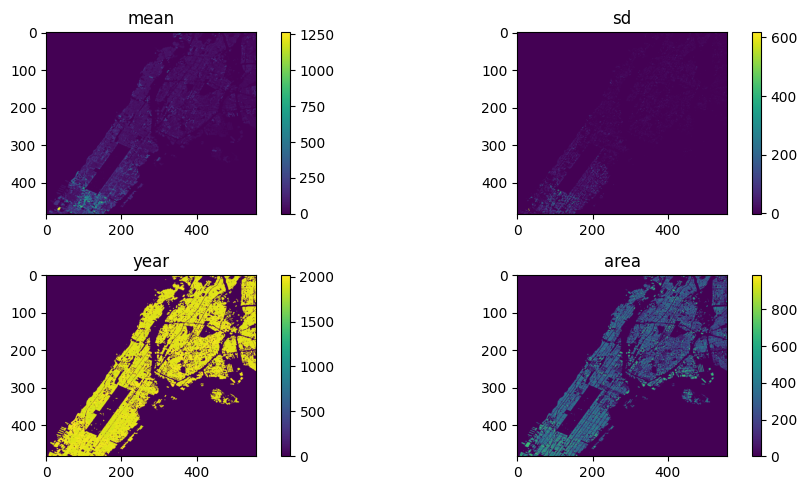

In [87]:
# Reads and plots four bands (B04, B08, B06, B01) from the GeoTIFF file.

# Open the GeoTIFF file
tiff_path = "data/tiff/building_res30.tiff"

# Read the bands from the GeoTIFF file
with rasterio.open(tiff_path) as dst:
    building_height_mean = dst.read(1)
    building_height_std_dev = dst.read(2)
    building_year = dst.read(3)
    building_area = dst.read(4)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

band_lst = [building_height_mean, building_height_std_dev, building_year, building_area*0.092903b]
band_name = ['mean', 'sd', 'year', 'area']
# Flatten the axes for easier indexing
axes = axes.flatten()

for i in range(len(band_lst)):
    im = axes[i].imshow(band_lst[i], cmap='viridis')
    axes[i].set_title(band_name[i])
    fig.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()


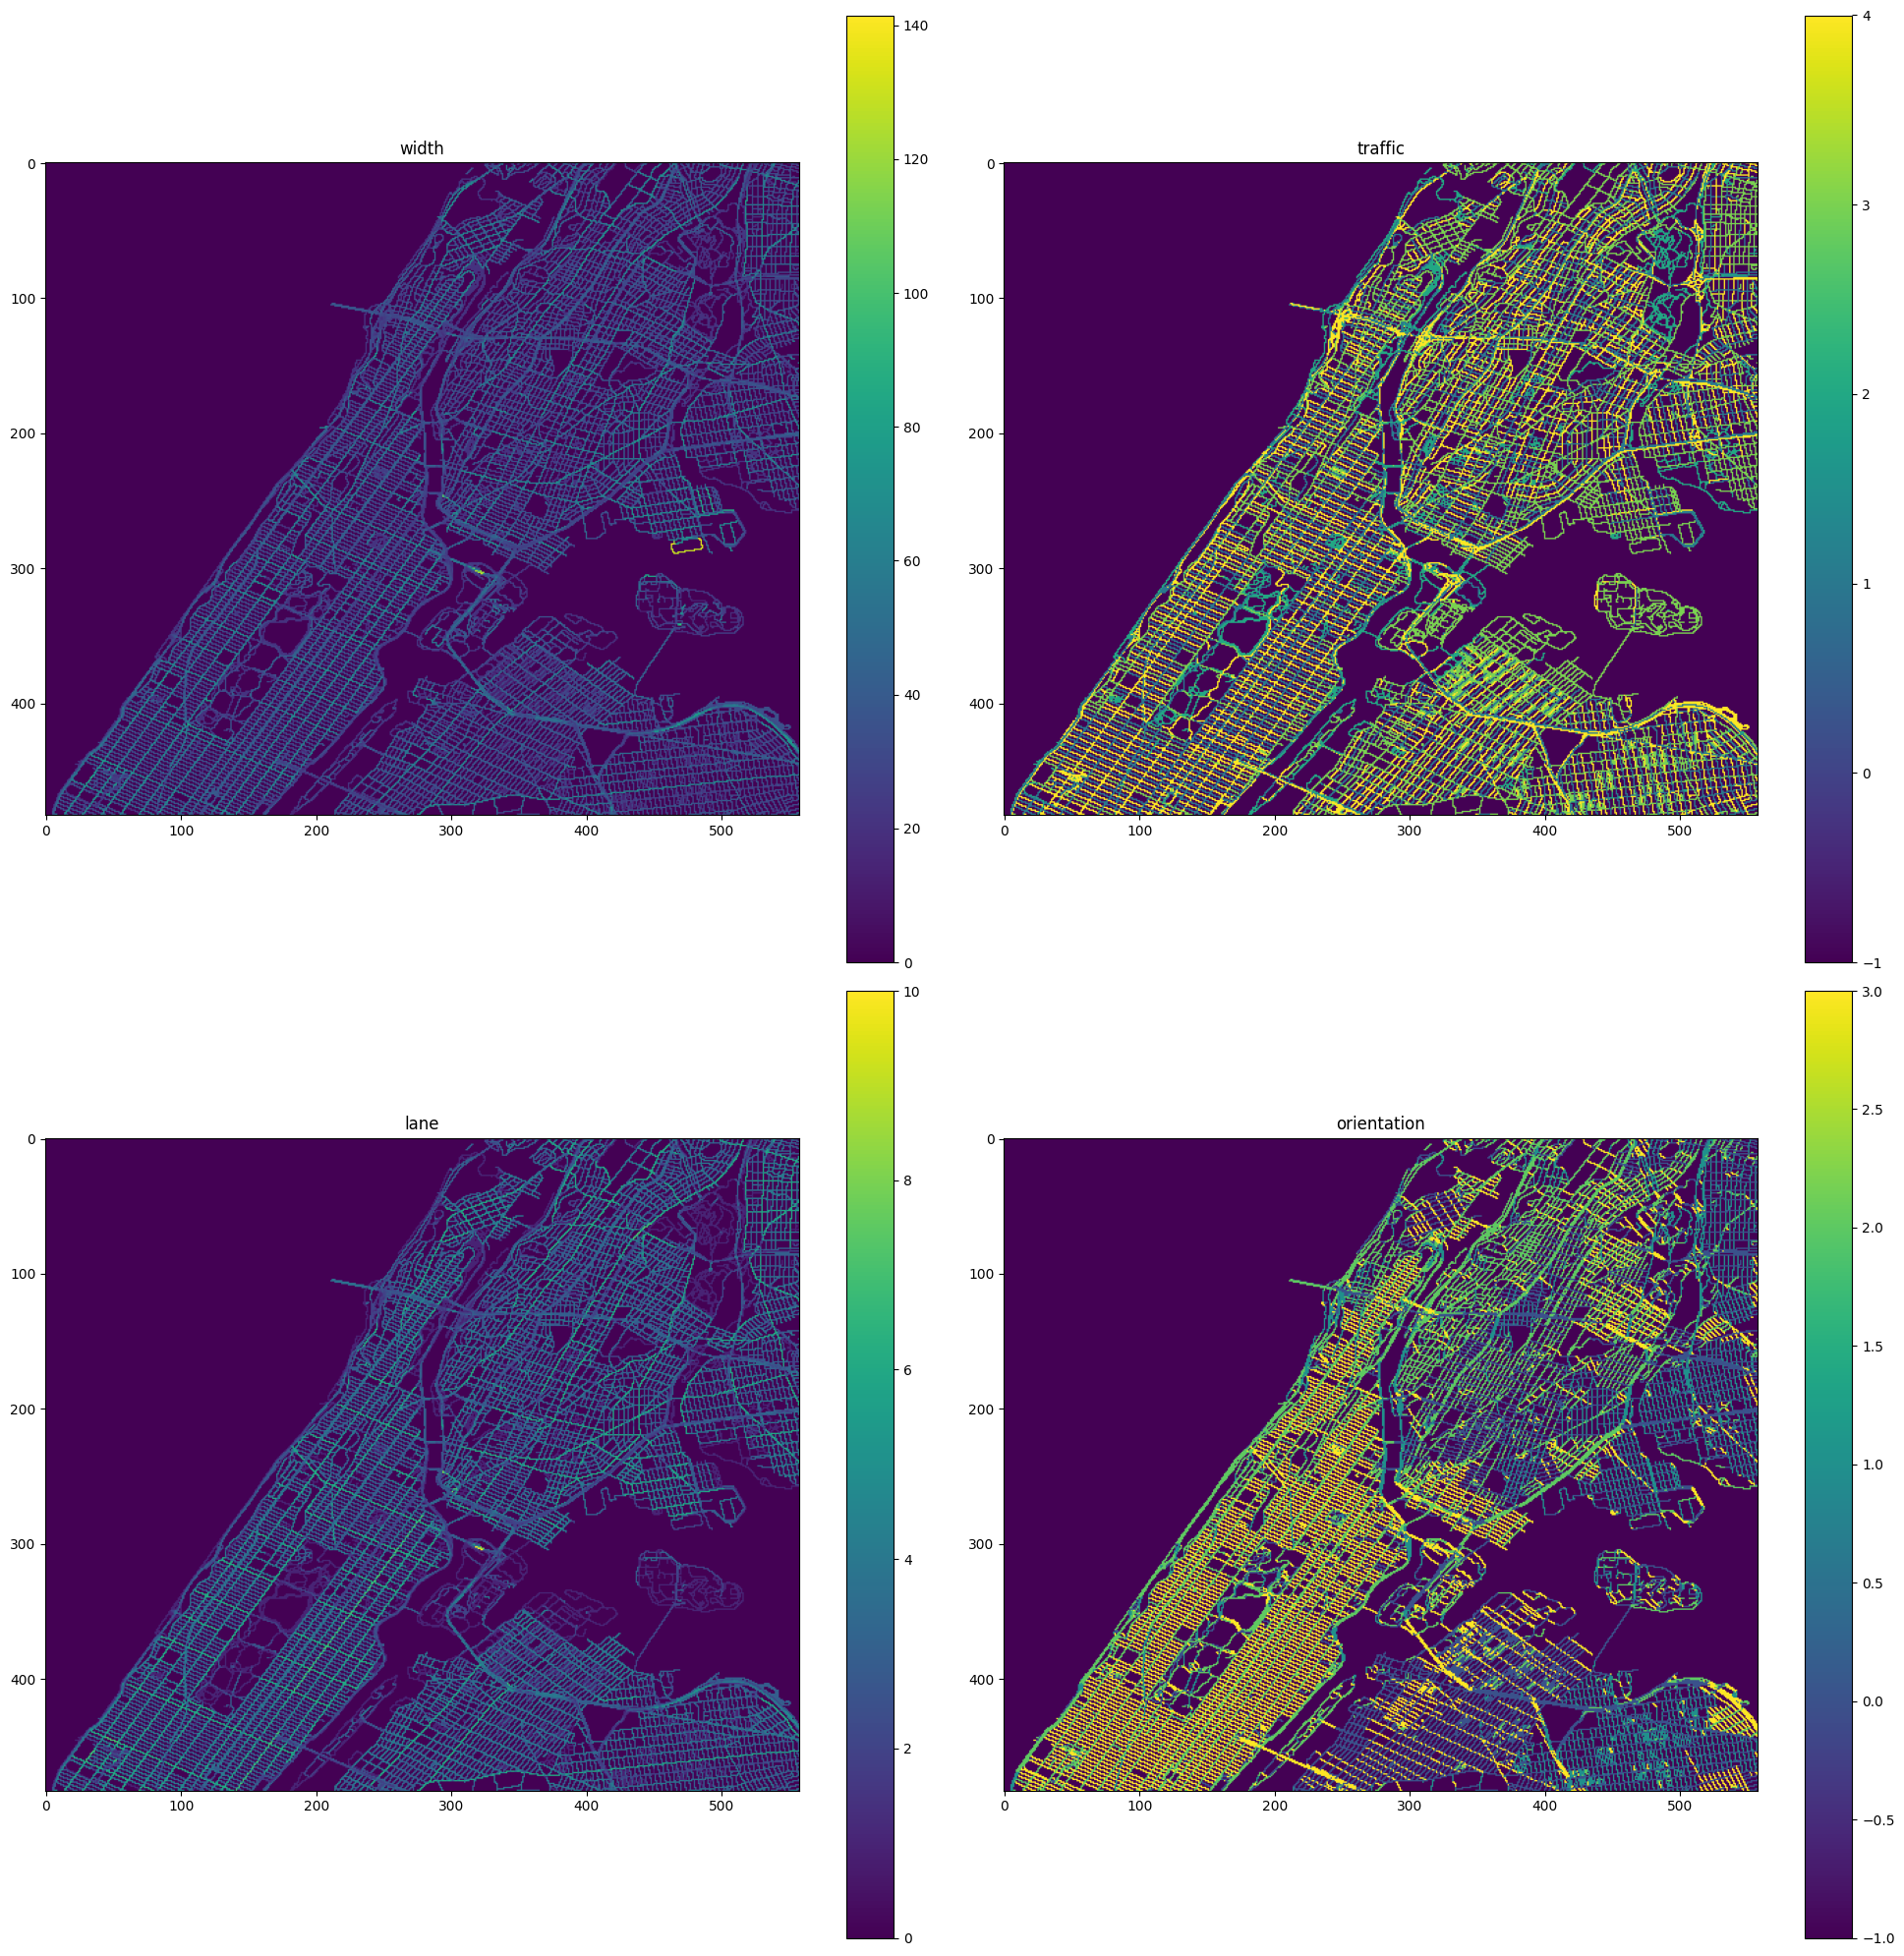

In [97]:
# Reads and plots four bands (B04, B08, B06, B01) from the GeoTIFF file.

# Open the GeoTIFF file
tiff_path = "data/tiff/street_res30.tiff"

# Read the bands from the GeoTIFF file
with rasterio.open(tiff_path) as dst:
    street_width = dst.read(1)
    traffic_dir = dst.read(2)
    street_lane = dst.read(3)
    orientation = dst.read(4)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

band_lst = [street_width, traffic_dir, street_lane, orientation]
band_name = ['width', 'traffic', 'lane', 'orientation']
# Flatten the axes for easier indexing
axes = axes.flatten()

for i in range(len(band_lst)):
    im = axes[i].imshow(band_lst[i], cmap='viridis')
    axes[i].set_title(band_name[i])
    fig.colorbar(im, ax=axes[i])

plt.tight_layout()
plt.show()


In [92]:
street_width

array([[ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 35.84028 ,       nan,       nan,       nan],
       [ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,       nan,     

In [141]:
df['direction'].value_counts()

direction
NE-SW    14183
NW-SE    10131
E-W       9624
N-S       6209
Name: count, dtype: int64

In [4]:
df.columns

Index(['OBJECTID', 'Join_ID', 'StreetCode', 'Street', 'TrafDir',
       'StreetWidth_Min', 'StreetWidth_Max', 'RW_TYPE', 'POSTED_SPEED',
       'Number_Travel_Lanes', 'Number_Park_Lanes', 'Number_Total_Lanes',
       'FeatureTyp', 'SegmentTyp', 'BikeLane', 'BIKE_TRAFDIR', 'XFrom',
       'YFrom', 'XTo', 'YTo', 'ArcCenterX', 'ArcCenterY', 'NodeIDFrom',
       'NodeIDTo', 'NodeLevelF', 'NodeLevelT', 'TRUCK_ROUTE_TYPE',
       'Shape__Length', 'geometry'],
      dtype='object')

In [5]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40147 entries, 0 to 40146
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   OBJECTID             40147 non-null  int32   
 1   Join_ID              40147 non-null  object  
 2   StreetCode           40147 non-null  object  
 3   Street               40147 non-null  object  
 4   TrafDir              40147 non-null  object  
 5   StreetWidth_Min      35608 non-null  float64 
 6   StreetWidth_Max      35629 non-null  float64 
 7   RW_TYPE              40147 non-null  object  
 8   POSTED_SPEED         40147 non-null  object  
 9   Number_Travel_Lanes  35632 non-null  float64 
 10  Number_Park_Lanes    23572 non-null  float64 
 11  Number_Total_Lanes   35632 non-null  float64 
 12  FeatureTyp           40147 non-null  object  
 13  SegmentTyp           40147 non-null  object  
 14  BikeLane             40147 non-null  object  
 15  BIKE_TRAFDI

In [151]:
# COORDS = [-74.01, 40.75, -73.86, 40.88]
# df_filter = df.cx[COORDS[0]:COORDS[2], COORDS[1]:COORDS[3]]

df_filter['RW_TYPE'].str.strip().unique()

is_street = ~df_filter['FeatureTyp'].isin(['2', '5', '7', '9', 'F'])
not_imaginary = ~df_filter['SegmentTyp'].isin(['G', 'F'])
canyon_type = ~df_filter['RW_TYPE'].isin([' 4', '12', '14'])
constructed = df_filter['Status'] == "2"

df_filter2 = df_filter[is_street & not_imaginary & canyon_type & constructed]

# feature_to_keep = ['OBJECTID', 'Join_ID', 'StreetCode', 'Street', 
#                    'TrafDir', 'StreetWidth_Min', 'StreetWidth_Max', 'RW_TYPE', 'POSTED_SPEED'
#                    'Number_Travel_Lanes', 'Number_Park_Lanes', 'Number_Total_Lanes',
#                    'LBlockFaceID', 'RBlockFaceID',
#                    'FeatureTyp', 'SegmentTyp',
#                     'XFrom', 'YFrom', 'XTo', 'YTo', 'ArcCenterX', 'ArcCenterY',
#                     'NodeIDFrom', 'NodeIDTo', 'NodeLevelF', 'NodeLevelT',
#                     'TRUCK_ROUTE_TYPE', 'Shape__Length', 'geometry']



In [166]:
df_filter2['Number_Park_Lanes'] = df_filter2['Number_Park_Lanes'].str.strip()
df_filter2['Number_Park_Lanes'] = np.where(df_filter2['Number_Park_Lanes'] == '', None, df_filter2['Number_Park_Lanes'])
df_filter2['Number_Park_Lanes'] = df_filter2['Number_Park_Lanes'].astype('float')

In [91]:
category_column = 'SegmentTyp'
label_column = 'OBJECTID'

# Plot the GeoDataFrame, color by category
df_segment = df_filter[~df_filter['SegmentTyp'].isin(['G', 'F'])]
# df_segment = df_segment[df_segment['SegmentTyp'].isin(['R'])]
# df_segment = df_segment.cx[-73.92:-73.96, 40.84:40.855]
df_segment = df_segment[df_segment['Street'] == '2000 CB BOUNDARY']
# Plot the GeoDataFrame, color by category
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
df_segment.plot(column=category_column, 
         ax=ax, 
         legend=True, 
         cmap='Set3')

# Add labels for each feature
# for idx, row in df_segment.iterrows():
#     ax.annotate(text=row[label_column], 
#                 xy=row['geometry'].centroid.coords[0],  # Position the label at the centroid of the geometry
#                 xytext=(3, 3),  # Offset the label a little bit
#                 textcoords="offset points",
#                 fontsize=10, 
#                 color='black')

# Set plot title
ax.set_title(f"Map colored by {category_column} with labels", fontsize=14)

# Show plot
plt.show()

In [8]:
df.groupby('FeatureTyp')[['StreetWidth_Min', 'StreetWidth_Max']].describe()

StreetWidth_Min                                                \
                     count       mean        std   min   25%   50%   75%   
FeatureTyp                                                                 
0                  34311.0  37.055959  13.590819   0.0  30.0  32.0  44.0   
6                    622.0  27.512862  11.820272  11.0  20.0  22.0  34.0   
A                    595.0  14.282353   4.868051   6.0  10.0  12.0  18.0   
W                     80.0  24.475000   9.692716  10.0  16.0  23.0  30.0   

                  StreetWidth_Max                                          \
              max           count       mean        std   min   25%   50%   
FeatureTyp                                                                  
0           120.0         34332.0  40.599383  14.963175   8.0  30.0  35.0   
6            85.0           622.0  41.577170  19.778231  15.0  24.0  39.0   
A            44.0           595.0  16.556303   7.553275   6.0  12.0  15.0   
W            60.0            80.0  29.225000  10.739699  12.0  22.0  24.0   

                         
             75%    max  
FeatureTyp               
0           50.0  238.0  
6           50.0  132.0  
A           20.0   68.0  
W           32.0   72.0

In [9]:
df.groupby('SegmentTyp')[['StreetWidth_Min', 'StreetWidth_Max']].describe()

StreetWidth_Min                                                \
                     count       mean        std   min   25%   50%   75%   
SegmentTyp                                                                 
B                    220.0  45.554545   8.133123  30.0  40.0  50.0  52.0   
C                    132.0  27.590909  12.708088   8.0  16.0  30.0  40.0   
E                   1845.0  21.844986   5.916981  10.0  18.0  22.0  25.0   
R                   6702.0  32.624739   9.487016  10.0  26.0  32.0  36.0   
S                    165.0  36.751515   8.046667  16.0  30.0  40.0  44.0   
T                    393.0  27.475827   8.928860  10.0  22.0  26.0  30.0   
U                  26151.0  38.603304  14.361480   0.0  30.0  34.0  50.0   

                  StreetWidth_Max                                          \
              max           count       mean        std   min   25%   50%   
SegmentTyp                                                                  
B            70.0           222.0  48.036036   8.003877  32.0  44.0  52.0   
C            50.0           134.0  28.567164  12.592185   8.0  17.0  30.0   
E            52.0          1846.0  27.456663   9.137078  10.0  22.0  25.0   
R           120.0          6721.0  38.013540  13.070253  10.0  30.0  35.0   
S            60.0           167.0  38.269461   8.291698  16.0  32.0  40.0   
T            70.0           395.0  29.645570   9.793085  10.0  24.0  30.0   
U           104.0         26144.0  41.812309  15.717917   6.0  30.0  36.0   

                         
             75%    max  
SegmentTyp               
B           52.0   72.0  
C           40.0   50.0  
E           32.0   76.0  
R           44.0  130.0  
S           44.0   70.0  
T           34.0   70.0  
U           52.0  238.0

In [11]:
df.groupby('RW_TYPE')[['StreetWidth_Min', 'StreetWidth_Max']].describe()

StreetWidth_Min                                                       \
                  count       mean        std   min   25%   50%   75%    max   
RW_TYPE                                                                        
1               28701.0  38.378732  13.588662   0.0  30.0  34.0  45.0  104.0   
10                595.0  14.282353   4.868051   6.0  10.0  12.0  18.0   44.0   
13                 86.0  32.069767   9.570532  14.0  22.5  32.0  40.0   50.0   
2                2330.0  34.000858   9.156715  12.0  30.0  34.0  36.0   70.0   
3                1782.0  34.209877  13.421293  10.0  24.0  32.0  40.0  120.0   
6                 307.0  19.778502   7.329977  10.0  15.0  18.0  24.0   60.0   
7                  20.0  24.000000   7.539370  10.0  18.0  29.0  30.0   32.0   
8                 121.0  23.033058   7.838935  10.0  20.0  20.0  25.0   50.0   
9                1666.0  22.034214   6.451996  10.0  18.0  22.0  25.0   80.0   

        StreetWidth_Max                                                       
                  count       mean        std   min   25%   50%   75%    max  
RW_TYPE                                                                       
1               28735.0  41.259649  14.915709   8.0  30.0  36.0  50.0  238.0  
10                595.0  16.556303   7.553275   6.0  12.0  15.0  20.0   68.0  
13                 86.0  33.337209   9.075644  16.0  26.0  34.0  40.0   50.0  
2                2328.0  43.203179  11.928646  18.0  34.0  44.0  50.0  100.0  
3                1772.0  41.194695  18.736574  10.0  30.0  36.0  50.0  130.0  
6                 306.0  28.960784  12.780560  12.0  20.0  25.0  35.0   84.0  
7                  16.0  24.125000   7.356403  12.0  18.0  29.0  30.0   32.0  
8                 121.0  38.561983  17.201692  12.0  24.0  35.0  48.0   90.0  
9                1670.0  27.608383   9.457732  10.0  22.0  25.0  32.0   80.0

In [13]:
df['str_width_min'] = df['StreetWidth_Min'] / df['Number_Travel_Lanes'] * df['Number_Total_Lanes']
df['str_width_max'] = df['StreetWidth_Max'] / df['Number_Travel_Lanes'] * df['Number_Total_Lanes']

df.groupby('FeatureTyp')[['str_width_min', 'str_width_max']].describe()

str_width_min                                                       \
                   count       mean        std   min   25%   50%   75%    max   
FeatureTyp                                                                      
0                34299.0  66.949434  30.387197   8.0  38.0  78.0  90.0  162.0   
6                  622.0  41.817792  31.870800  11.0  20.0  30.0  48.0  150.0   
A                  595.0  16.154622  11.836269   6.0  10.0  12.0  18.0  132.0   
W                   78.0  38.064103  25.167924  10.0  16.0  30.0  51.5  118.0   

           str_width_max                                                       
                   count       mean        std   min   25%   50%   75%    max  
FeatureTyp                                                                     
0                34274.0  72.132643  31.947923   8.0  44.0  80.0  96.0  714.0  
6                  621.0  62.541170  48.787626  15.0  32.0  45.0  76.0  255.0  
A                  595.0  19.319328  19.355670   6.0  12.0  15.0  20.0  204.0  
W                   78.0  43.923077  26.296644  12.0  22.0  44.0  52.5  144.0

In [14]:
df.groupby('SegmentTyp')[['str_width_min', 'str_width_max']].describe()

str_width_min                                                       \
                   count       mean        std   min   25%   50%   75%    max   
SegmentTyp                                                                      
B                  220.0  46.318182  10.286252  30.0  40.0  50.0  52.0  100.0   
C                  132.0  28.560606  15.462468   8.0  16.0  30.0  40.0  100.0   
E                 1843.0  22.023332   6.530809  10.0  18.0  22.0  25.0   96.0   
R                 6701.0  41.344202  17.096687  10.0  30.0  36.0  51.0  136.0   
S                  165.0  40.181818  15.642061  16.0  30.0  40.0  44.0  120.0   
T                  393.0  36.379559  16.267583  10.0  24.0  34.0  45.0   98.0   
U                26140.0  75.836521  28.505311   6.0  60.0  90.0  90.0  162.0   

           str_width_max                                                        
                   count       mean        std   min   25%   50%    75%    max  
SegmentTyp                                                                      
B                  220.0  48.681818   9.987144  32.0  44.0  52.0   52.0  100.0  
C                  132.0  29.303030  15.278553   8.0  16.0  30.0   40.0  100.0  
E                 1842.0  27.665852   9.603508  10.0  22.0  25.0   32.0  102.0  
R                 6704.0  47.335347  18.771669  10.0  34.0  46.0   56.0  168.0  
S                  165.0  41.660606  14.904778  16.0  34.0  40.0   44.0  105.0  
T                  394.0  39.270728  18.315745  10.0  26.0  35.5   48.0  144.0  
U                26111.0  81.222930  30.878447   6.0  64.0  90.0  100.0  714.0

In [15]:
df.groupby('RW_TYPE')[['str_width_min', 'str_width_max']].describe()

str_width_min                                                          \
                count       mean        std   min   25%        50%        75%   
RW_TYPE                                                                         
1             28690.0  73.722760  27.861746   8.0  50.0  86.666667  90.000000   
10              595.0  16.154622  11.836269   6.0  10.0  12.000000  18.000000   
13               86.0  33.093023   9.615708  14.0  26.0  34.500000  40.000000   
2              2329.0  34.286818  10.011616  12.0  30.0  34.000000  36.000000   
3              1782.0  42.889637  24.868713  10.0  24.0  32.000000  53.333333   
6               305.0  25.845902  20.382668  10.0  15.0  18.000000  24.000000   
7                20.0  58.200000  36.883315  10.0  18.0  87.000000  90.000000   
8               121.0  38.760331  25.888229  10.0  20.0  30.000000  48.000000   
9              1666.0  22.392557   8.136422  10.0  18.0  22.000000  25.000000   

                str_width_max                                                 \
            max         count       mean        std   min   25%   50%    75%   
RW_TYPE                                                                        
1        162.00       28692.0  78.593729  30.388449   8.0  56.0  90.0  98.00   
10       132.00         595.0  19.319328  19.355670   6.0  12.0  15.0  20.00   
13        50.00          86.0  34.360465   8.978291  16.0  28.5  35.0  40.00   
2         81.25        2327.0  43.518694  12.617561  18.0  34.0  44.0  50.00   
3        120.00        1772.0  50.662810  28.421854  10.0  30.0  42.0  62.25   
6         96.00         294.0  34.942177  23.568795  12.0  20.0  25.0  44.00   
7         96.00          16.0  54.375000  37.779845  12.0  18.0  59.0  90.00   
8        120.00         121.0  64.074380  45.593707  12.0  32.0  48.0  76.00   
9        120.00        1665.0  28.008108  10.671593  10.0  22.0  25.0  32.00   

                 
            max  
RW_TYPE          
1        714.00  
10       204.00  
13        50.00  
2        106.25  
3        160.00  
6        144.00  
7         96.00  
8        252.00  
9        120.00

In [35]:
convert_to_float(df['BikeLane'])

array([nan, nan, nan, ...,  1.,  1.,  1.], shape=(40147,))

In [31]:
np.where(df['BIKE_TRAFDIR'].str.strip() == '', None, df['BIKE_TRAFDIR'].str.strip())

array([None, None, None, ..., 'TW', 'TW', 'TW'],
      shape=(40147,), dtype=object)

In [27]:
cols = ['Street', 'StreetWidth_Min', 'StreetWidth_Max', 'str_width_min', 'str_width_max', 
        'Number_Travel_Lanes', 'Number_Park_Lanes', 'Number_Total_Lanes',
        'direction']
df.loc[~df['Street'].isna() & ~df['str_width_min'].isna(), cols]

Street  StreetWidth_Min  StreetWidth_Max  \
0                 EAST 168 STREET             34.0             34.0   
1                 WEST 192 STREET             30.0             30.0   
2                    UNION AVENUE             34.0             34.0   
3                    UNION AVENUE             34.0             34.0   
4                    UNION AVENUE             34.0             34.0   
...                           ...              ...              ...   
40116  BROOKLYN QUEENS EXPRESSWAY             58.0             70.0   
40117                   51 STREET             26.0             30.0   
40118                   51 STREET             26.0             30.0   
40119                   51 STREET             26.0             30.0   
40120                    31 DRIVE             48.0             48.0   

       str_width_min  str_width_max  Number_Travel_Lanes  Number_Park_Lanes  \
0               68.0           68.0                  2.0                2.0   
1               90.0           90.0                  1.0                2.0   
2              102.0          102.0                  1.0                2.0   
3              102.0          102.0                  1.0                2.0   
4              102.0          102.0                  1.0                2.0   
...              ...            ...                  ...                ...   
40116           58.0           70.0                  4.0                NaN   
40117           52.0           60.0                  1.0                1.0   
40118           52.0           60.0                  1.0                1.0   
40119           52.0           60.0                  1.0                1.0   
40120           48.0           48.0                  4.0                NaN   

       Number_Total_Lanes direction  
0                     4.0     NE-SW  
1                     3.0     NE-SW  
2                     3.0     NE-SW  
3                     3.0     NE-SW  
4                     3.0     NE-SW  
...                   ...       ...  
40116                 4.0     NE-SW  
40117                 2.0     NE-SW  
40118                 2.0     NE-SW  
40119                 2.0     NE-SW  
40120                 4.0     NE-SW  

[35594 rows x 9 columns]

In [6]:
df_filter['FeatureTyp'].unique()

array(['0', 'W', '6', '9', 'A', '3', '5', 'F', '8', '7', '1', '2'],
      dtype=object)

In [2]:
df = df.dropna(subset=['the_geom', 'bin', 'cnstrct_yr', 'heightroof'], how='any')
df.shape

(1072673, 16)

In [3]:
df['lstmoddate'] = pd.to_datetime(df['lstmoddate'])
df['bin'] = df['bin'].astype('int')
df['cnstrct_yr'] = df['cnstrct_yr'].astype('int')
df['heightroof'] = df['heightroof'].astype('float')
df['feat_code'] = df['feat_code'].astype('int')
df.shape

(1072673, 16)

In [7]:
# built_before_2021 = df['cnstrct_yr'] <= 2021
# in_mahanttan_bronx = (df['bin'] // 10**6).isin([1, 2])
# higher_12_feet = df['heightroof'] >= 12
# is_building = df['feat_code'].isin([1006, 2100])
# constructed_before_date = (df['lstmoddate'] < '2021-07-24') & (df['lststatype'].isin(['Constructed']))
df_filter = df[built_before_2021 
               & in_mahanttan_bronx 
               & higher_12_feet 
               & is_building 
               & constructed_before_date
               ]
print(df_filter.shape)

(128733, 16)


In [8]:
# Filter the areas
df_filter['the_geom'] = df_filter['the_geom'].apply(lambda x: shape(x) if x is not None else x)
print(df_filter.shape)
df_filter = df_filter.set_geometry('the_geom', crs="EPSG:4326")
# lower_left = (40.75, -74.01)
# upper_right = (40.88, -73.86)
# lower_left[1]:upper_right[1], lower_left[0]:upper_right[0]
# coords:  [-74.01, 40.75, -73.86, 40.88]
COORDS = [-74.01, 40.75, -73.86, 40.88]
print(COORDS[1], COORDS[3])
df_filter = df_filter.cx[COORDS[0]:COORDS[2], COORDS[1]:COORDS[3]]
print(df_filter.shape)
# df = df.to_crs(epsg=2263)

C:\Users\USER\AppData\Local\Temp\ipykernel_6284\4222002081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['the_geom'] = df_filter['the_geom'].apply(lambda x: shape(x) if x is not None else x)


(128733, 16)
40.75 40.88
(61056, 16)


In [ ]:
gdf_build = gpd.GeoDataFrame(building, geometry="the_geom", crs="EPSG:4326")
gdf_build = gdf_build.cx[lower_left[1]:upper_right[1], lower_left[0]:upper_right[0]]

df = df.set_geometry('the_geom', crs="EPSG:4326")
gdf_build = gdf_build.to_crs(epsg=2263)

gdf_build['SHAPE_AREA'] = gdf_build['the_geom'].area
mod_date = pd.to_datetime(gdf_build['LSTMODDATE'])
build_cond = (gdf_build['CNSTRCT_YR'] <= 2021) \
    & (gdf_build['BIN'] // 10**6).isin([1, 2]) \
    & (gdf_build['HEIGHTROOF'] >= 12) \
    & (gdf_build['SHAPE_AREA'] >= 400) \
    & (gdf_build['FEAT_CODE'].isin([1006, 2100])) \
    & ((mod_date < '2021-07-24') & (gdf_build['LSTSTATYPE'].isin(['Constructed'])))

In [47]:
import matplotlib.pyplot as plt

df[df['shape_area'] > 500000].plot(figsize=(6, 6), edgecolor="black", alpha=0.5)
plt.show()

In [66]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1082896 entries, 0 to 1082895
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   the_geom    1082896 non-null  geometry
 1   bin         1082895 non-null  object  
 2   cnstrct_yr  1072674 non-null  object  
 3   lstmoddate  1082896 non-null  object  
 4   lststatype  1082554 non-null  object  
 5   doitt_id    1082896 non-null  object  
 6   heightroof  1082894 non-null  object  
 7   feat_code   1082896 non-null  object  
 8   groundelev  1082347 non-null  object  
 9   shape_area  1082896 non-null  float64 
 10  shape_len   1082896 non-null  object  
 11  base_bbl    1082895 non-null  object  
 12  mpluto_bbl  1082895 non-null  object  
 13  geomsource  1082585 non-null  object  
 14  globalid    1082896 non-null  object  
 15  name        2238 non-null     object  
dtypes: float64(1), geometry(1), object(14)
memory usage: 132.2+ MB


In [76]:
# df = df.dropna(subset=['the_geom', 'bin', 'cnstrct_yr', 'heightroof'])
df.shape

(1072673, 16)

In [74]:
df['feat_code'].astype('int')

0          2100
1          2100
2          2100
3          2100
4          2100
           ... 
1082891    2100
1082892    2100
1082893    2100
1082894    2100
1082895    2100
Name: feat_code, Length: 1072673, dtype: int64

In [65]:
df[df['heightroof'].astype('float') > 1000].to_crs(epsg=4326)

the_geom      bin  \
47250    MULTIPOLYGON (((-73.98089 40.76605, -73.98136 ...  1090180   
47982    MULTIPOLYGON (((-73.97933 40.76539, -73.97917 ...  1088565   
59350    MULTIPOLYGON (((-74.01169 40.71123, -74.01166 ...  1088797   
59529    MULTIPOLYGON (((-74.0022 40.75431, -74.00268 4...  1091590   
61861    MULTIPOLYGON (((-74.00182 40.75324, -74.00192 ...  1088961   
750560   MULTIPOLYGON (((-73.98608 40.74891, -73.98482 ...  1015862   
949323   MULTIPOLYGON (((-73.97812 40.7621, -73.97778 4...  1090777   
982571   MULTIPOLYGON (((-73.99889 40.75525, -73.9992 4...  1090122   
983542   MULTIPOLYGON (((-73.97756 40.76466, -73.97758 ...  1023728   
985664   MULTIPOLYGON (((-73.99975 40.75413, -74.00072 ...  1090274   
987947   MULTIPOLYGON (((-74.01303 40.71262, -74.01367 ...  1088469   
1076995  MULTIPOLYGON (((-73.97906 40.75287, -73.97871 ...  1090825   
1079208  MULTIPOLYGON (((-73.9824 40.69076, -73.98228 4...  3000370   
1081134  MULTIPOLYGON (((-73.97155 40.76179, -73.97178 ...  1088817   

        cnstrct_yr               lstmoddate   lststatype doitt_id  \
47250         2020  2025-01-08T00:00:00.000  Constructed  1277275   
47982         2009  2017-08-22T00:00:00.000  Constructed  1256209   
59350         2009  2024-12-26T00:00:00.000  Constructed  1255672   
59529         2018  2024-12-26T00:00:00.000  Constructed  1114726   
61861         2018  2019-01-22T00:00:00.000  Constructed  1284821   
750560        1931  2017-08-22T00:00:00.000  Constructed   778052   
949323        2020  2023-08-21T00:00:00.000  Constructed  1284000   
982571        2022  2023-01-19T00:00:00.000  Constructed  1297058   
983542        1924  2021-01-04T00:00:00.000       Merged  1260269   
985664        2021  2021-02-26T00:00:00.000  Constructed  1288981   
987947        2009  2021-06-15T00:00:00.000  Constructed  1114961   
1076995       2021  2023-07-18T00:00:00.000  Constructed  1284912   
1079208       2022  2024-02-08T00:00:00.000  Constructed   540645   
1081134       2016  2024-05-03T00:00:00.000  Constructed  1119374   

            heightroof feat_code groundelev     shape_area shape_len  \
47250           1550.0      1006         80   42118.187575       0.0   
47982    1018.54529693      2100         46   21274.581193       0.0   
59350           1064.0      2100         21   56961.670810       0.0   
59529           1039.0      2100         28   30772.916973       0.0   
61861           1265.0      2100        NaN  194750.610666       0.0   
750560   1238.79032716      2100         50   85500.730707       0.0   
949323          1050.0      2100         66   19202.804306       0.0   
982571          1029.0      2100         42   54237.354834       0.0   
983542          1428.0      2100         58   20079.009693       0.0   
985664          1011.0      2100         40   46900.039727       0.0   
987947     1408.377901      2100          5   41528.434203       0.0   
1076995         1401.0      2100         60   43313.015527       0.0   
1079208         1035.0      2100         40   45214.718502       0.0   
1081134         1396.0      2100         49   34488.937764       0.0   

           base_bbl  mpluto_bbl  geomsource  \
47250    1010290043  1010297502  Other (Man   
47982    1010100010  1010107506  Photogramm   
59350    1000580001  1000580001  Photogramm   
59529    1007020150  1007027503  Other (Man   
61861    1007020125  1007027501  Other (Man   
750560   1008350041  1008350041  Photogramm   
949323   1012690006  1012697502  Other (Man   
982571   1007060017  1007060017  Other (Man   
983542   1010100025  1010107507  Other (Man   
985664   1007050039  1007050039  Other (Man   
987947   1000580001  1000580001  Photogramm   
1076995  1012770027  1012770027  Other (Man   
1079208  3001490100  3001497503  Other (Man   
1081134  1012920033  1012927502  Other (Man   

                                       globalid                     name  
47250    {C06C9BD7-D0C5-4206-910C-29F53CB9DE91}                      NaN  
47982    {B